# Activity 2

### Explore dimension reduction techniques

In [111]:
# import library
library(MASS)

In [112]:
# import data
dat = read.csv('prof_train.csv')
# remove factors
dat1 = dat[, c(2,3,4,7,8,9,10,11)]  # Define a new dataset with only the numerical variables (no factors)
head(dat1)

numYears,numRaters,numCourses,quality,helpfulness,clarity,easiness,raterInterest
1,16,3,2.406250,2.375000,2.437500,1.937500,2.875000
2,20,5,3.925000,4.000000,3.500000,3.850000,3.250000
11,25,12,4.620000,4.720000,4.520000,2.480000,4.117647
5,67,3,2.977612,2.955224,3.000000,2.373134,2.552239
3,15,3,2.500000,2.733333,2.266667,2.733333,3.000000
6,19,4,4.684211,4.894737,4.473684,4.210526,4.368421


## Method 1: Principal Component Analysis

In [113]:
pca = prcomp(dat1[, -4], center = T, scale = T) # let the algorithm determine the principal components

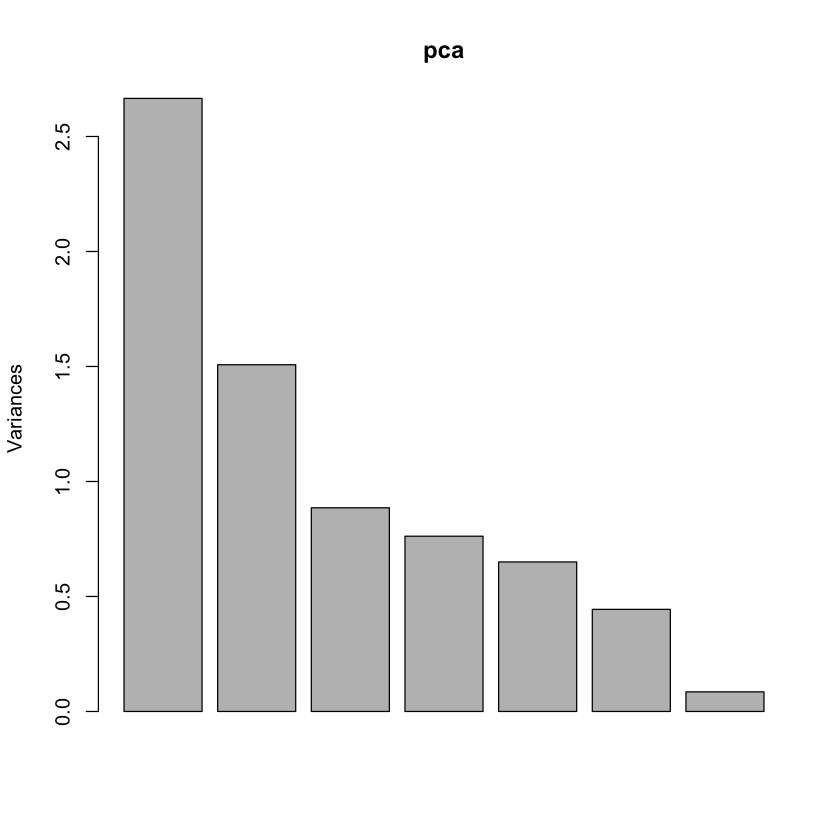

In [114]:
plot(pca)

### This plot shows the amount of variance in the response variable (quality) explained by each principle component, from the first to the last. The first principal component explains the most variance; the last principal component explains the least variance. 

In [115]:
summary(pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.6327 1.2278 0.9411 0.8729 0.80628 0.66634 0.29196
Proportion of Variance 0.3808 0.2154 0.1265 0.1089 0.09287 0.06343 0.01218
Cumulative Proportion  0.3808 0.5961 0.7227 0.8315 0.92439 0.98782 1.00000

### We select the top 5 principal components. These 5 PCs explain more than 90% of variance in the "quality" rating. 

In [116]:
dat2 = data.frame( pca$x[, 1:5], dat1$quality)  #data set with transformed dimensions
names(dat2)[6] = 'quality'
head(dat2)

PC1,PC2,PC3,PC4,PC5,quality
2.1251658,2.4073775,0.5309594,-0.5290510,-1.0010573,2.406250
-0.8550735,1.2251134,0.1020759,-1.7136085,-0.3207200,3.925000
-1.3292526,-2.9619565,2.8954905,-1.2375413,0.4928029,4.620000
1.7801265,-0.0820706,-1.6787772,-0.3776327,-1.9145657,2.977612
1.5100751,2.0660180,0.2508230,-0.5517965,-0.4031339,2.500000
-2.9983591,0.3672533,0.7029138,-0.2040512,-0.3593602,4.684211


In [117]:
# fit model with the new dimensions
mod1 = lm(quality ~ PC1 + PC2 + PC3 + PC4 + PC5, data = dat2)

### Use the same principal components to transform the variables in the test dataset

In [118]:
test = read.csv('prof_test.csv')
head(test)

gender,numYears,numRaters,numCourses,pepper,discipline,helpfulness,clarity,easiness,raterInterest,area
female,5,42,6,yes,SocSci,4.547619,4.523810,2.500000,3.761905,Midwest
female,2,15,1,no,Pre-prof,3.666667,3.200000,3.200000,3.000000,Midwest
male,11,57,5,no,Hum,2.280702,1.894737,2.631579,3.166667,Midwest
female,1,10,4,yes,Hum,3.900000,4.000000,3.400000,3.900000,Midwest
female,2,16,1,yes,SocSci,4.937500,4.937500,4.000000,2.187500,Midwest
male,11,79,7,no,Hum,2.696203,2.443038,2.658228,2.956522,Midwest


In [119]:
test.x = scale(as.matrix(test[, c(2:4, 7:10)])) # rescale the data to remove the effect of units
test.x.pc = test.x %*% pca$rotation
head(test.x.pc)

PC1,PC2,PC3,PC4,PC5,PC6,PC7
-1.22699444,-0.3069296,1.01076677,-0.2982261,-1.5915237,1.1348633,-0.03615729
0.06556846,2.8992968,-0.40768662,-0.2503924,-0.6165176,0.1108290,-0.33138361
2.82202531,-0.9199962,-0.07252084,0.2534153,-0.6005416,-1.2277207,-0.16069100
-1.44106491,2.1867742,1.36585565,-0.8435836,-0.9924622,-0.1668347,0.15914574
-1.89962486,2.6858612,-2.26337307,-0.9510415,0.3325122,1.6459523,-0.01895452
2.49893074,-2.2070815,-0.62663920,-0.5026997,-1.0752072,-0.5462454,-0.06212187


### Here is your predicted "quality" ratings! 

In [120]:
predict(mod1, data.frame(test.x.pc))

1        2        3        4        5        6        7        8 
4.058746 3.252074 2.236151 3.888215 4.348548 2.509740 3.437128 3.693466 
       9       10       11       12       13       14       15       16 
2.161583 2.760720 1.440593 4.419258 3.050965 3.020168 3.481190 3.905201 
      17       18       19       20       21       22       23       24 
3.588971 4.812263 2.388400 2.796440 3.562585 4.085977 4.173945 4.236468 
      25       26       27       28       29       30       31       32 
3.146812 3.740440 4.347279 4.378467 3.923372 2.825915 3.509194 3.448874 
      33       34       35       36       37       38       39       40 
3.267417 3.888481 4.003062 3.726646 3.075667 4.043228 3.085974 5.404575

In [121]:
truth = read.csv('prof_test_truth.csv')
mean(abs(truth$quality - predict(mod1, data.frame(test.x.pc))))

[1] 0.2436201

### Interesting, PCA performs worse than the regression model using only the "helpfulness" rating. 

## Method 2: Linear Discriminant Analysis

In [122]:
mod2 = lda(quality ~ numYears + numRaters + numCourses + helpfulness + clarity + easiness + raterInterest, data=dat1)

In [123]:
# predicted "quality" rating
pred2 = as.numeric(as.character(predict(mod2)$class))

### Prediction using the LDA model

In [124]:
pred2 = as.numeric(as.character(predict(mod2, test)$class))

In [125]:
mean(abs(pred2 - truth$quality))

[1] 0.01136549

## Congratulations! We've finished Activity 2! 